# Concepts

#### *variationalform* <https://variationalform.github.io/>

#### *Just Enough: progress at pace*

<https://variationalform.github.io/>

<https://github.com/variationalform>

<https://www.brunel.ac.uk/people/simon-shaw>.


<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses python</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

# Penguins: Exploring Some Key Concepts

We'll be using the *penguins* data that we have seen before in order
to introduce, understand and work with these concepts:

- Binary Classifiers
- Confusion Matrices
- Decision Boundaries
- True and False Postives and Negatives
- sensitivity, specificity, precision, recall, F1 score, prevalence,

These terms and their usage will be coming back again and again.

We will also discuss the fairness dilemma, using Sumpter (2021) as a source:

- Sumpter (2021) Ethics in Machine Learning, In: Machine Learning: A First Course for Engineers and Scientists, Cambridge University Press

This is no more than Chapter 12 of our reference book [MLFCES] as introduced in an earlier session:

- MLFCES: Machine Learning: A First Course for Engineers and Scientists, by Andreas Lindholm, Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön. Cambridge University Press. <http://smlbook.org>

First we bring in our standard imports...

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
import seaborn as sns
import time

... plus the newer ones we learned about last time. 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Back to where we were

We'll bring in the penguins data set and clean it up just as in the previous session. 
We do this bit quickly because there is nothing new here.

> **NOTE:** *we wont always be going through such detailed coding. The purpose of these
introductory sessions is to set you up with __code templates__ that you can take and
adjust to suit your needs.* Once you have those we will be able to spend more time 
looking at the machine learning models themselves.


In [3]:
dfp = sns.load_dataset('penguins')
dfp2 = dfp.dropna()
dfp2.isna().sum()
dfp2 = dfp2.reset_index(drop=True)

In [4]:
dfp.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [5]:
dfp2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


We have already seen how we can use $k$-NN to predict the species in
column zero, from the numerical data in columns 3 - 6 (indexed as 2 - 5).

Here is that code again...

We fitted the model using the Manhattan metric:
$\Vert\boldsymbol{x}^* - \boldsymbol{x}_i\Vert_1$, 
and then plotted the confusion matrix and performance data. 

In [6]:
# create our labelled training and test data sets with 60/40 train/test split
X = dfp2.iloc[:, 2:6].values
y = dfp2.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [7]:
# scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# obtain the classifier and fit it using 2 nearest neighbours
# and the Manhattan norm
classifier = KNeighborsClassifier(n_neighbors=2, p=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2, p=1)

In [9]:
# Now use the fitted model from the training data to predict
# from the test data.
y_pred = classifier.predict(X_test)

In [10]:
# create a confusion matrix to assess the performance

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

clsrep = classification_report(y_test, y_pred)
print("Classification Report:",)
print(clsrep)

accsc = accuracy_score(y_test,y_pred)
print("Accuracy:", accsc)

Confusion Matrix:
[[56  0  0]
 [ 2 30  0]
 [ 0  0 46]]
Classification Report:
              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        56
   Chinstrap       1.00      0.94      0.97        32
      Gentoo       1.00      1.00      1.00        46

    accuracy                           0.99       134
   macro avg       0.99      0.98      0.98       134
weighted avg       0.99      0.99      0.98       134

Accuracy: 0.9850746268656716


### The Confusion Matrix

The confusion matrix is square with the same number of rows/columns
as there are values for the label. In our case there are three 
possible label values: *Adelie*, *Chinstrap*, and *Gentoo*. We can refer
to these as group 1, 2 and 3.

The entry in row $i$ and column $j$ of the confusion matrix tells
us how many data points in `X_test` that were in group $i$ were
predicted by the model to be in group $j$. For details see

<https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html>

Now, the representation of the confusion matrix above is a numpy
array and although it is useful for coding, it isn't very 
user friendly. The following code gives us something much nicer,
and it is much easier to understand.

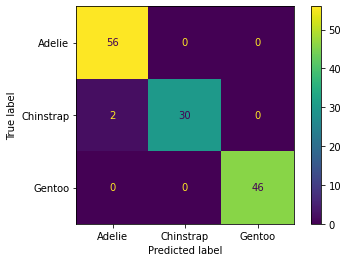

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
cmplot = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
cmplot.plot()
plt.show()

We can now immediately get a feeling for *how good* the model is. The diagonal
elements tell us how many species predictions match the true value. The
off-diagonals tell us how many misses there are, and how they missed.

For example, the number in the middle of the top row tells us how many Adelie
penguins were mistakenly predicted to be Chinstraps.

Also, the overall accuracy percentage can be determined by adding all the
numbers in the matrix, calling the total $B$, and adding all the diagonal elements
together, as $A$. The value of $A/B$ then tells us the proportion of correct 
predictions - and that is the *Accuracy* score above.

We haven't yet properly reviewed the mathematical concept and notion of
a matrix yet, although we will do soon. We will be coming back to 
confusion matrices over and over again though. 

The confusion matrix can be large or small. A particularly important case
is the $2\times 2$ case. 

## Binary Classifier

What we are doing above is _**classifying**_: given data from a specific observation
we are deciding what class that observation belongs to.

In the case above we are attempting to use physiological data to classify the 
species of penguin.

A particularly important type of classifier arises when we are simply trying to
decide 'Yes' or 'No', or 'True' or 'False', 'Guilty' or 'Innocent', 
'Diseased' or 'Healthy' and so on.

There are only two classes: generically termed **positive** and **negative**.

Such a classifier is called a **Binary Classifier**, and the confusion matrix bears
further discussion in this case.

Let's return to the penguin data and try to predict gender from the other
physiological characteristics. This will be a binary classifier, because 
it will either predict 'Female' (**positive**) or 'Not-Female' (**negative**).

Let's start by recalling the structure of the data frame.


In [12]:
dfp2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


We can double check that 'Female' and 'Male' are the only entries in the
gender column like this:

In [13]:
dfp2['sex'].unique()

array(['Male', 'Female'], dtype=object)

### Predicting gender from just two data items

Below we want to introduce the notion of a **decision boundary**. This is 
best done graphically and for that we want to work with 2D plots. 

This means that we want our $k$-NN classifier to be able to predict gender from
just two columns of data.

The question then, is which two columns to choose?

Let's have a look at the choices available to us. We could try looking at the table...


In [14]:
dfp2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


... but how are we ever going to be able to make a good decision as to which
pair of columns like that?

Here is a better way (at least if you don't have too many columns):

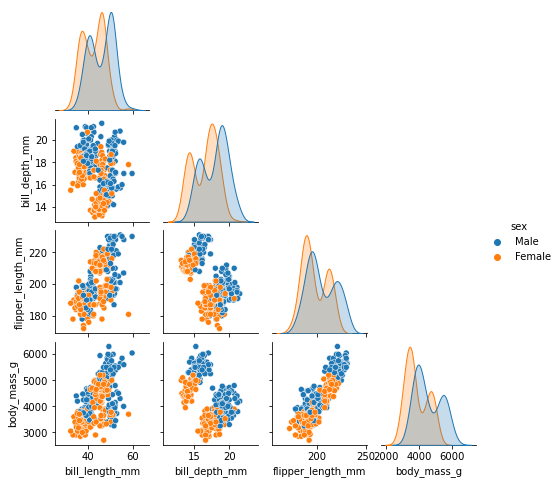

In [15]:
sns.pairplot(dfp2, corner=True, hue='sex', height=1.7)

It looks from this that *bill depth* and *body mass* should work well
to separate out genders.


Even here, the term **Decision Boundary** might make some intuitive sense
to you. What do you think it might mean?

Let's build the binary classifier using just these two columns, and 
get the confusion matrix just as before.

We'll do it all in one go, because we've seen all the steps before...

In [16]:
# extract the input/features X, and the output/labels y
X = dfp2.iloc[:, [3,5]].values
y = dfp2.iloc[:, 6].values
# optionally, print the first few just to check
print(X[0:4,:])
print(y[0:4])
# bifurcate the data to get a 40% test set, and 60% training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

# print out the sizes of the train and test sets
print('\n')
print('X_train has ', X_train.shape[0], ' rows and ', X_train.shape[1], ' columns')
print('y_train has ', y_train.shape[0], ' rows')
print('\n')
print('X_test has ', X_test.shape[0], ' rows and ', X_test.shape[1], ' columns')
print('y_test has ', y_test.shape[0], ' rows')
print('\n')

# get scaling parameters from the training data, 
scaler = StandardScaler()
scaler.fit(X_train)
# scale the training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# now classify using k=2, p=1 - as before
classifier = KNeighborsClassifier(n_neighbors=2, p=1)
classifier.fit(X_train, y_train)
# and then make predictions from the test data 
y_pred = classifier.predict(X_test)

# compare the predictions with the ground truth, or hold-out set, y_test
cm = confusion_matrix(y_test, y_pred)

# and print the results out
print("Confusion Matrix:")
print(cm)
clsrep = classification_report(y_test, y_pred)
print('\n')
print("Classification Report:",)
print(clsrep)
accsc = accuracy_score(y_test,y_pred)
print('\n')
print("Accuracy:", accsc)

[[  18.7 3750. ]
 [  17.4 3800. ]
 [  18.  3250. ]
 [  19.3 3450. ]]
['Male' 'Female' 'Female' 'Female']


X_train has  199  rows and  2  columns
y_train has  199  rows


X_test has  134  rows and  2  columns
y_test has  134  rows


Confusion Matrix:
[[68  6]
 [ 8 52]]


Classification Report:
              precision    recall  f1-score   support

      Female       0.89      0.92      0.91        74
        Male       0.90      0.87      0.88        60

    accuracy                           0.90       134
   macro avg       0.90      0.89      0.89       134
weighted avg       0.90      0.90      0.90       134



Accuracy: 0.8955223880597015


We have seen before that there is another way to display the 
confusion matrix that is friendlier on the eye. We'll do this
below.

Alos, we note from above that there are `134` data points in
the test set and so we should expect the numbers in the confusion matrix
to sum to that number. It's a useful check...

In [17]:
print(cm.sum())

134


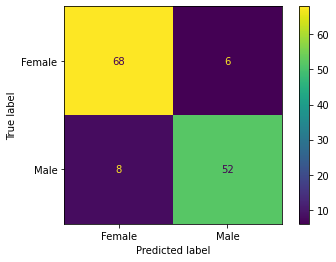

In [18]:
cmplot = ConfusionMatrixDisplay(cm, display_labels=classifier.classes_)
cmplot.plot()
plt.show()

## True and False Positives and Negatives

There are a few particularly important pieces of terminology that 
are associated with binary classifiers. 

- **TP**, *True Positives*: This is the number of test data points
that are labelled **POSITIVE** for which the classifier correctly
(**truly**) predicted them as **POSITIVE**.

- **FP**, *False Positives*: This is the number of test data points
that are labelled **NEGATIVE** for which the classifier incorrectly
(**falsely**) predicted them as **POSITIVE**.

Since we are regarding **Female** as **POSITIVE**, we can see these 
numbers in the first column above.

Furthermore,

- **FN**, *False Negatives*. This is the number of test data points
that are labelled **POSITIVE** for which the classifier incorrectly
(**falsely**) predicted them as **NEGATIVE**.

- **TN**, *True Negatives*. This is the number of test data points
that are labelled **NEGATIVE** for which the classifier incorrectly
(**truly**) predicted them as **NEGATIVE**.

These last two are in the second column.

Diagrammatically we have


$$
\begin{array}{rcc}
  \begin{array}{r}  \text{target, or true} \\ \text{label/class}  \end{array}\quad
  &
  \begin{array}{c}  + \\ -  \end{array}\!\!
  &
  \left(
  \begin{array}{cc}
  \mathrm{TP} & \mathrm{FN} \\
  \mathrm{FP} & \mathrm{TN} \\
  \end{array}
  \right)
\\
& & \begin{array}{cc} + & - \end{array}
\\
& & \text{output, or predicted}
\\
& & \text{label/class}
\\
\end{array}
$$


We can access these numbers in code as follows:

In [19]:
TP = cm[0,0]; FP = cm[1,0]; FN = cm[0,1]; TN = cm[1,1]
print(TP, FN)
print(FP, TN)

68 6
8 52


# Related Formulae and Measures

Once we have these data we can compute a wide variety of different performance
indicators. Here are the most commonly used, where we use $\mathrm{P}$ and
$\mathrm{N}$ for the number of positives and negatives overall in the test set.

- **Prevalance**:

$$
\mathrm{Prevalance} = \frac{\mathrm{P}}{\mathrm{P}+\mathrm{N}}
$$

- TPR: **True Positive Rate**, *sensitivity*, *recall*:

$$
\mathrm{TPR} = \frac{\mathrm{TP}}{\mathrm{P}} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}
$$


- TNR: **True Negative Rate**, *specificity*, *selectivity*:

$$
\mathrm{TNR} = \frac{\mathrm{TN}}{\mathrm{N}} = \frac{\mathrm{TN}}{\mathrm{TN}+\mathrm{FP}}
$$

- FPR: **False Positive Rate**:

$$
\mathrm{FPR} = \frac{\mathrm{FP}}{\mathrm{N}} = \frac{\mathrm{FP}}{\mathrm{FP}+\mathrm{TN}}
$$

- FNR: **False Negative Rate**:

$$
\mathrm{FNR} = \frac{\mathrm{FN}}{\mathrm{P}} = \frac{\mathrm{FN}}{\mathrm{FN}+\mathrm{TP}}
$$

- **Accuracy**:

$$
\mathrm{Accuracy} = \frac{\mathrm{TP}+\mathrm{TN}}{\mathrm{P}+\mathrm{N}}
$$

- **Balanced Accuracy**:

$$
\mathrm{Balanced\ Accuracy} = \frac{1}{2}\left(\mathrm{TPR}+\mathrm{TNR}\right)
$$



- PPV: **Positive Predictive Value**, *precision*:

$$
\mathrm{PPV} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}
$$



- NPV: **Negative Predictive Value**:

$$
\mathrm{NPV} = \frac{\mathrm{TN}}{\mathrm{TN}+\mathrm{FN}}
$$

- F1 score: this is the *harmonic mean* of precision and sensitivity:

$$
\mathrm{F1} = \left(
\frac{\displaystyle\left(\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}\right)^{-1}
      +
      \left(\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}\right)^{-1}}{2}
\right)^{-1}
= \frac{2\,\mathrm{TP}}{2\,\mathrm{TP}+\mathrm{FP}+\mathrm{FN}}
$$

Let's calculate some of these

In [20]:
P=TP+FN
N=FP+TN
print('P (# positives) = ', P)
print('N (# negatives) = ', N)
print('TPR (recall)    = ', TP/(TP+FN))
print('PPV (precision) = ', TP/(TP+FP))
print('F1              = ', 2*TP/(2*TP+FP+FN))
print('Accuracy        = ', (TP+TN)/(P+N))

P (# positives) =  74
N (# negatives) =  60
TPR (recall)    =  0.918918918918919
PPV (precision) =  0.8947368421052632
F1              =  0.9066666666666666
Accuracy        =  0.8955223880597015


But - remember this?

In [21]:
print("Classification Report:",)
print(clsrep)
accsc = accuracy_score(y_test,y_pred)
print("Accuracy:", accsc)

Classification Report:
              precision    recall  f1-score   support

      Female       0.89      0.92      0.91        74
        Male       0.90      0.87      0.88        60

    accuracy                           0.90       134
   macro avg       0.90      0.89      0.89       134
weighted avg       0.90      0.90      0.90       134

Accuracy: 0.8955223880597015


With *Females* as *Positive* we can read off the **precision**,
**recall** and **F1 score** from the table, and obtain the
**accuracy** as a by-product of the classification as well.

Also, **support** tells us what $\mathrm{P}$ is.


### Decision Boundaries

Let's now try and develop a bit more intuition as to how this classifier
works, and what we can expect from it.

The following observation will be relevant to other classification
techniques as well.

Let's recap:

- we have a training data set of features.
- these features are points in space.
- each training point has a label - its *class*
- we introduce a new point: it will have some 'nearest neighbours'
- we use the nearest neighbours' classes to classify the new point

Imagine this for a binary classifier where the the data points,
the features, are points in 2D.

We can imagine that the binary output can be coloured. For example:

> **RED** for **POSITIVE** (i.e. *female*)

> **BLUE** for **NEGATIVE** (i.e. *male*)

We can already see something like this from the scatter plots.


<AxesSubplot:xlabel='bill_depth_mm', ylabel='body_mass_g'>

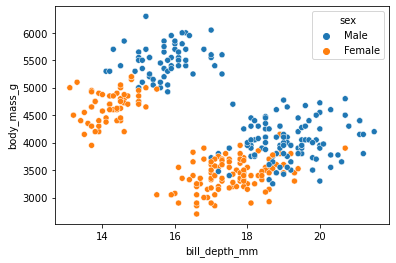

In [22]:
sns.scatterplot(data=dfp2, x="bill_depth_mm", y="body_mass_g", hue="sex")

From this diagram we can imagine drawing a line that attempts to separate the
RED and BLUE regions. Such a line is called a **Decision Boundary**.

On one side of the boundary we decide **POSITIVE**, and on the other we
decide **NEGATIVE**.

We're not going to actually get a pen and draw this line though.

We're going to illustrate the decision boundary with code.

# Plotting the decision boundary

We are going to do this at a low level using `matplotlib`. First let's look
closely at our predictions.

In [23]:
print(y_pred)

['Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Male' 'Male' 'Male'
 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Female' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Female' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Male' 'Female' 'Female' 'Male' 'Female' 'Male' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Female'
 'Female' 'Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Female'
 'Male' 'Female' 'Female' 'Female' 'Male' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Male' 'Female' 'Female' 'Male' 'Female' 'Male' 'Female'
 'Male' 'Female' 'Male' 'Male' 'Female' 'Female' 'Male' 'Female' 'Female'
 'Male' 'Male' 'Male' 'Male' 'Female' 'Male' 'Female' 'Male' 'Male' 'Male'
 'Female' 'Female' 'Male' 'Female' 'Female' 'Male' 'Female' 'Female'
 'Female' 'Female' 'Male' 'Female' 'Female' 'Female' 'Male' 'Female'
 'Male' 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' '

We're going to find all the array indices for **POSITIVE** (*Female*)
predictions and all the indices for **NEGATIVE** (*Male*) predictions.

We can print them out to see what is going on, but we don't have to...

In [24]:
indxM = np.where(y_pred == 'Male')[0]
indxF = np.where(y_pred != 'Male')[0]
print(indxM, len(indxM))
print(indxF, len(indxF))

[  2   6   7   8   9  10  11  14  17  20  21  23  28  31  33  34  37  38
  39  41  43  46  47  48  51  56  61  65  70  71  74  76  78  80  81  84
  87  88  89  90  92  94  95  96  99 102 107 111 113 116 117 118 122 126
 127 128 132 133] 58
[  0   1   3   4   5  12  13  15  16  18  19  22  24  25  26  27  29  30
  32  35  36  40  42  44  45  49  50  52  53  54  55  57  58  59  60  62
  63  64  66  67  68  69  72  73  75  77  79  82  83  85  86  91  93  97
  98 100 101 103 104 105 106 108 109 110 112 114 115 119 120 121 123 124
 125 129 130 131] 76


We can visualize these predictions with a scatter plot like this:

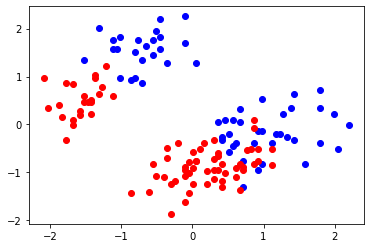

In [25]:
plt.scatter(X_test[indxM,0], X_test[indxM,1], color='blue')
plt.scatter(X_test[indxF,0], X_test[indxF,1], color='red')

And we can recall the ground truth in the whole data set like this:

(333, 7) 133.20000000000002


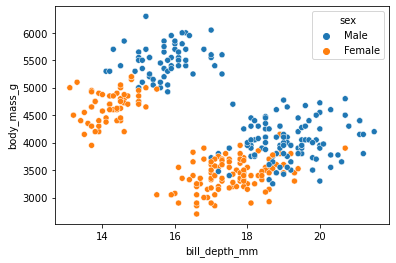

In [26]:
sns.scatterplot(data=dfp2, x="bill_depth_mm", y="body_mass_g", hue="sex")
print(dfp2.shape, 0.4*dfp2.shape[0])

They aren't the same. They shouldn't be. This is because:

- The number of predictions is less than the number of data points
because of the train-test split.

- Also, the predictions may not be correct, so points at the same
location in 2D may have different colours.

We can easily check the first of these above by looking at the
shape of the arrays like this... 

In [27]:
print(y_pred.shape)
print(X_test.shape)
print(X_test[indxM,:].shape)
print(X_test[indxF,:].shape)
print(X_test[indxM,:].shape[0] + X_test[indxF,:].shape[0])

(134,)
(134, 2)
(58, 2)
(76, 2)
134


However, these scatter plots don't really give us the separating line
that we have been discussing - the **Decision Boundary**.

That is going to take a bit more work.

The idea is to decide on a range of values for the features in
`X_test` and then to create a regular grid.

We then predict the label on that regular grid and color the 
point accordingly. 

It is a bit involved, but here we go... The code was adapted from
that found here:

<https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07>


In [28]:
# define bounds of the domain using max and min of our features
x1min, x1max = X_test[:, 0].min()-1, X_test[:, 0].max()+1
x2min, x2max = X_test[:, 1].min()-1, X_test[:, 1].max()+1

# define the x and y scale - this sets up a point spacing of 0.1
x1grid = np.arange(x1min, x1max, 0.1)
x2grid = np.arange(x2min, x2max, 0.1)

# create arrays for the grid coordinates
xx1, xx2 = np.meshgrid(x1grid, x2grid)
print('xx1.shape = ', xx1.shape)
print('xx2.shape = ', xx2.shape)

xx1.shape =  (62, 63)
xx2.shape =  (62, 63)


In [29]:
# original efforts - can be deleted.
#xx1xx2 = np.hstack((xx1.reshape((len(xx1),1)),xx2.reshape((len(xx2),1))))
#xx1xx2 = np.vstack((xx1.flatten(), xx2.flatten()))
#print(xx1xx2)

This is fine for plotting, but the prediction model needs just a
list of pairs of features. So we have to flatten these grids 

In [30]:
xx1xx2 = np.stack((xx1.flatten(), xx2.flatten()), axis=-1)
print(xx1xx2.shape)

(3906, 2)


Now we can predict the label at each of the grid points.

> **NOTE:** `X_test` has already been normalized.

In [31]:
y_pred = classifier.predict(xx1xx2)

And then scatter plot these in different colours according to prediction.

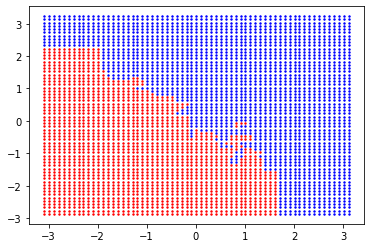

In [32]:
indxF = np.where(y_pred == 'Female')[0]
indxM = np.where(y_pred != 'Female')[0]
plt.scatter(xx1xx2[indxM,0], xx1xx2[indxM,1], color='blue' , s=2)
plt.scatter(xx1xx2[indxF,0], xx1xx2[indxF,1], color='red', s=2)

(333, 7) 133.20000000000002


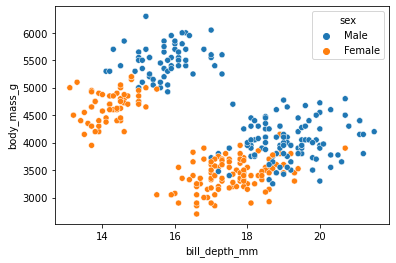

In [33]:
# the ground truth of the entire data set we have seen earlier, it's this:
sns.scatterplot(data=dfp2, x="bill_depth_mm", y="body_mass_g", hue="sex")
print(dfp2.shape, 0.4*dfp2.shape[0])

It would be nice to overlay these onto the decision boundary diagram.

Well, first we plot these in matplotlib like so:

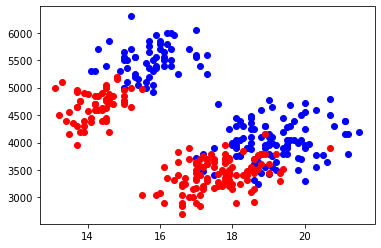

In [34]:
indxM = np.where(y == 'Male')[0]
indxF = np.where(y != 'Male')[0]
plt.scatter(X[indxM,0], X[indxM,1], color='blue')
plt.scatter(X[indxF,0], X[indxF,1], color='red')

It is now just a case of repeating the decision boundary plot from
earlier, and then following up with the one above. 

We have to do this in the **same cell** in order that they appear
on the same set of axes.

Remember also that the ground truth in `X` and `y` needs to be
scaled. We do this by creating `X_trans`.

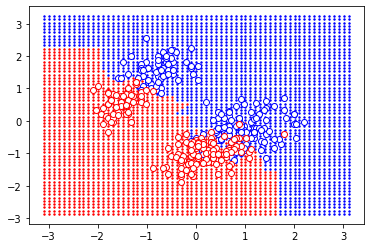

In [35]:
# repeat the plot from above
indxF = np.where(y_pred == 'Female')[0]
indxM = np.where(y_pred != 'Female')[0]
plt.scatter(xx1xx2[indxM,0], xx1xx2[indxM,1], color='blue' , s=2)
plt.scatter(xx1xx2[indxF,0], xx1xx2[indxF,1], color='red', s=2)

# scale the ground truth
X_trans = scaler.transform(X)

# now plot the ground truth using 'empty' circles
indxM = np.where(y == 'Male')[0]
indxF = np.where(y != 'Male')[0]
plt.scatter(X_trans[indxM,0], X_trans[indxM,1], facecolors='w', edgecolors='b')
plt.scatter(X_trans[indxF,0], X_trans[indxF,1], facecolors='w', edgecolors='r')

We'll come back to decision boundaries several times later on. It is worth
noting that we did everything here in 2D because these cases are easy to plot
and illustrate.

If we had more than two features then we would need to plot the features in
higher dimensional space - which is quite a challenge.

Nonetheless, a decision boundary can still be imagined that, for a binary
classifier, will separate these points into two disjoint regions. 

### Fairness - setting up the discussion

The last thing we are going to touch on here is the notion of 
**_fairness of a binary classifier_**.

- what do we mean by this?
- can a binary classifier ever be fair?

As mentioned above, we'll be using Sumpter (2021) as a source:

- Sumpter (2021) Ethics in Machine Learning, In: Machine Learning: A First Course for Engineers and Scientists, Cambridge University Press

This is in Chapter 12 of our reference book [MLFCES]:

- MLFCES: Machine Learning: A First Course for Engineers and Scientists, by Andreas Lindholm, Niklas Wahlström, Fredrik Lindsten, Thomas B. Schön. Cambridge University Press. <http://smlbook.org>


Consider a binary classifier applied to a population containing $p$
**POSITIVE** (or *true*) outcomes and $n$ **NEGATIVE** (or *false*) 
outcomes. We have seen that the confusion matrix takes this form:

$$
\begin{array}{rcc}
  \begin{array}{r}  \text{target} \\ \text{or true}  \end{array}\quad
  &
  \begin{array}{c}  + \\ -  \end{array}\!\!
  &
  \left(
  \begin{array}{cc}
  \mathrm{TP} & \mathrm{FN} \\
  \mathrm{FP} & \mathrm{TN} \\
  \end{array}
  \right)
\\
& & \begin{array}{cc} + & - \end{array}
\\
& & \text{predicted}
\\
\end{array}
$$

If there are $t$ TP's and $f$ FP's then:

$$
\begin{array}{cc}
  \begin{array}{c}  + \\ -  \end{array}\!\!
  &
  \left(
  \begin{array}{cc}
  \mathrm{TP} & \mathrm{FN} \\
  \mathrm{FP} & \mathrm{TN} \\
  \end{array}
  \right)
\\
 & \begin{array}{cc} + & - \end{array}
\end{array}
\qquad\qquad\text{ becomes }\qquad\qquad
\left(
\begin{array}{cc}
t & p-t \\
f & n-f \\
\end{array}
\right).
$$

Suppose now that this classifier is applied to data harvested from two
distinct populations. It could be that the classifier is making a
decision as to whether ...

- a certain age range of people in various demographic groups are inclined to crime
- individuals in various ethnic groups are entitled to healthcare
- children in different regions should get extra academic help
- how males and female respond to a certain treatment 

The question we want to consider is whether or not this classifier
can **treat each group fairly**.

Sumpter in [MLFCES] discusses it this way. We suppose that the classifier
is applied to two separate groups, giving these two confusion matrices:


$$
\left(
\begin{array}{cc}
t_1 & p_1-t_1 \\
f_1 & n_1-f_1 \\
\end{array}
\right)
\qquad\text{ and }\qquad
\left(
\begin{array}{cc}
t_2 & p_2-t_2 \\
f_2 & n_2-f_2 \\
\end{array}
\right).
$$

We note that

- $n_1$, $p_1$, $n_2$, $p_2$ are beyond our control - they are simply 'facts'
- $f_1$, $t_1$ and $f_2$, $t_2$ are a property of the model and how well it works.

### Remarks

Following Sumpter's ideas we now ask if this classifier can be **_fair_**.
Can we be sure that it performs the same on two different groups?

To make progress on this question note that in this scenario $p_i$ and $n_i$ are
beyond our control for each group ($i=1$ and $i=2$) - they are just facts.

Moreover, the $f_i$ and $t_i$ in each case are determined by the classification
method chosen, and the configuration of the algorithm (the selection of
**hyperparameters** for example). We have some control over these by 
our training procedure, but we cannot guarantee perfection.

### Fairness

We can attempt to tune the classifier by insisting that it performs *equally*
on both groups. Sumpter does this by...

- Asking that the FPR's are equal:

$$
\frac{f_1}{n_1} = \frac{f_2}{n_2}
\qquad\Longrightarrow\qquad
f_1 = \frac{f_2 n_1}{n_2}.
$$

- Asking that the TPR's are equal:

$$
\frac{t_1}{p_1} = \frac{t_2}{p_2}
\qquad\Longrightarrow\qquad
t_1 = \frac{t_2 p_1}{p_2}.
$$

- Asking for equal precision:

$$
\frac{t_1}{t_1 +f_1} = \frac{t_2}{t_2+f_2}
\qquad\Longrightarrow\qquad
\frac{\displaystyle\frac{t_2p_1}{p_2}}{\displaystyle\frac{t_2p_1}{p_2}+\frac{f_2n_1}{n_2}}
=
\frac{t_2}{t_2+f_2}
$$


The last of these used the first two and, when simplified, implies that

$$
\frac{t_2}{t_2+f_2}
=
\frac{t_2}{\displaystyle t_2 +f_2\frac{n_1}{n_2}\frac{p_2}{p_1}}
\qquad\Longrightarrow\qquad
f_1, f_2=0\quad\text{ or }\quad
\frac{p_1}{n_1} =\frac{p_2}{n_2}
$$

#### Implication

Fairness, in the sense described above, is probably not possible in general.
If the three measures above are to be indifferent to the two groups then:

- **Either:** the classifier is a perfect predictor for positive results in the
sense that each $f_i$, the numbers of FP's, is zero.

- **Or:** the ratios of positives to negatives are equal in each group.

Both of these are unlikely.

#### Closing Thoughts

You are referred to Sumpter's article for more details where, in particular,
we hear that solving this **fairness dilemma** is not a technical matter but
rather one of **ethics**.

Data Science is more than just computation. It is important to be aware of the
wider contexct in which we operate, as well as the limitations of our models
and methods.

What do you think?


## Technical Notes, Production and Archiving

Ignore the material below. What follows is not relevant to the material being taught.

#### Production Workflow

- Finalise the notebook material above
- Clear and fresh run of entire notebook
- Create html slide show:
  - `jupyter nbconvert --to slides 4_concepts.ipynb `
- Set `OUTPUTTING=1` below
- Comment out the display of web-sourced diagrams
- Clear and fresh run of entire notebook
- Comment back in the display of web-sourced diagrams
- Clear all cell output
- Set `OUTPUTTING=0` below
- Save
- git add, commit and push to FML
- copy PDF, HTML etc to web site
  - git add, commit and push
- rebuild binder

Some of this originated from

<https://stackoverflow.com/questions/38540326/save-html-of-a-jupyter-notebook-from-within-the-notebook>

These lines create a back up of the notebook. They can be ignored.

At some point this is better as a bash script outside of the notebook

In [36]:
%%bash
NBROOTNAME='4_concepts'
OUTPUTTING=0

if [ $OUTPUTTING -eq 1 ]; then
  jupyter nbconvert --to html $NBROOTNAME.ipynb
  cp $NBROOTNAME.html ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  mv -f $NBROOTNAME.html ./formats/html/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/pdf/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ../backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/py/
else
  echo 'Not Generating html, pdf and py output versions'
fi

Not Generating html, pdf and py output versions
